In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import collections
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support, accuracy_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.objectives import binary_crossentropy
from keras.callbacks import LearningRateScheduler
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras.backend as K
from keras.callbacks import Callback
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

Using TensorFlow backend.


In [84]:
df = pd.read_csv('e:/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [85]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Convert TotalCharges to numeric. 

In [87]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

There are many categorical features in the data set. Lets visualize them first then create dummy variables.

In [89]:
print([key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object'] ])

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222002204E0>,
      dtype=object)

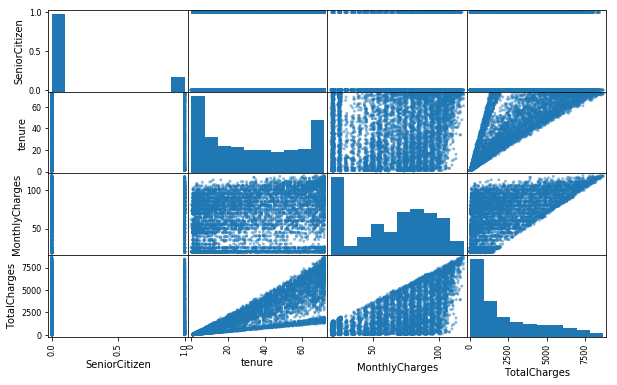

In [91]:
pd.scatter_matrix(df)

### Visualize and Analyze Categorical Features

### Gender

Gender Counter({'Male': 3555, 'Female': 3488})


Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


Churn,No,Yes
gender,,
Female,0.730791,0.269209
Male,0.738397,0.261603


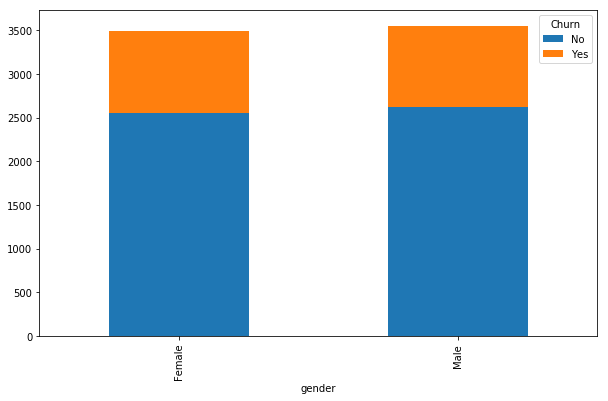

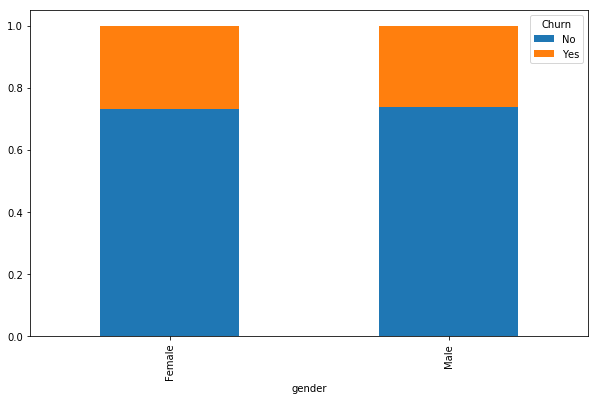

In [66]:
gender_plot = df.groupby(['gender', 'Churn']).size().reset_index().pivot(columns='Churn', index='gender', values=0)
gender_plot.plot(x=gender_plot.index, kind='bar', stacked=True);
print('Gender', collections.Counter(df['gender']))
gender_plot
gender_rate = gender_plot.div(gender_plot.sum(axis=1),axis=0)
gender_rate
gender_rate.plot(x=gender_rate.index,kind='bar',stacked=True)

### Partner

Partner Counter({'No': 3641, 'Yes': 3402})


Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


Churn,No,Yes
Partner,,
No,0.670420,0.329580
Yes,0.803351,0.196649


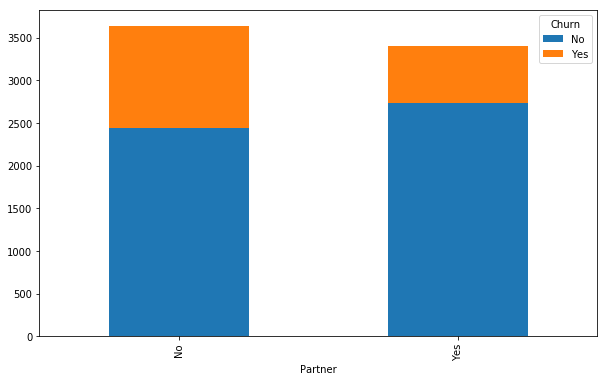

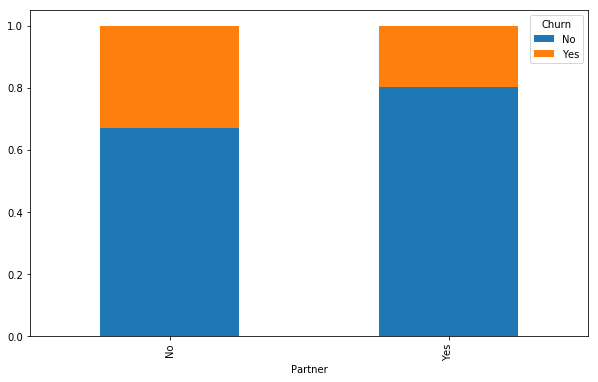

In [67]:
partner_plot = df.groupby(['Partner', 'Churn']).size().reset_index().pivot(columns='Churn', index='Partner', values=0)
partner_plot.plot(x=partner_plot.index, kind='bar', stacked=True);
print('Partner', collections.Counter(df['Partner']))
partner_plot
partner_rate = partner_plot.div(partner_plot.sum(axis=1),axis=0)
partner_rate
partner_rate.plot(x=partner_rate.index,kind='bar',stacked=True)

### Dependents

Dependents Counter({'No': 4933, 'Yes': 2110})


Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


Churn,No,Yes
Dependents,,
No,0.687209,0.312791
Yes,0.845498,0.154502


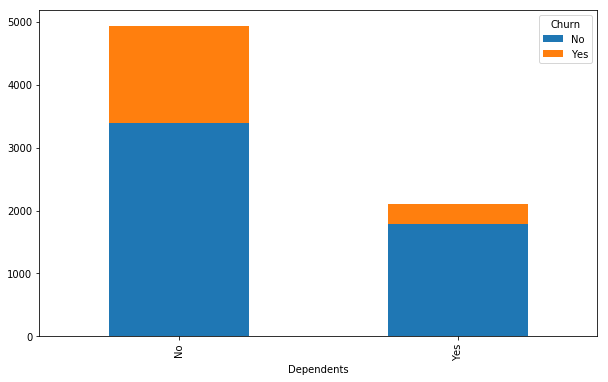

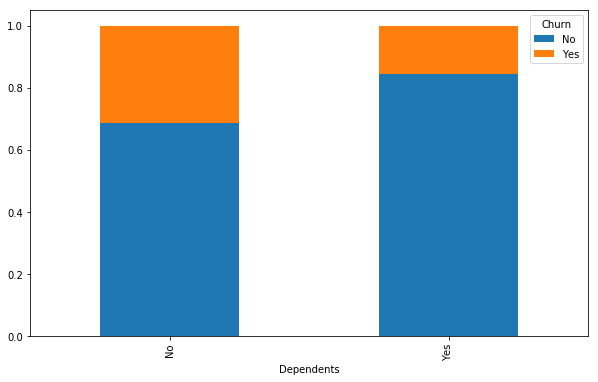

In [68]:
dependents_plot = df.groupby(['Dependents', 'Churn']).size().reset_index().pivot(columns='Churn', index='Dependents', values=0)
dependents_plot.plot(x=dependents_plot.index, kind='bar', stacked=True);
print('Dependents', collections.Counter(df['Dependents']))
dependents_plot
dependents_rate = dependents_plot.div(dependents_plot.sum(axis=1),axis=0)
dependents_rate
dependents_rate.plot(x=dependents_rate.index,kind='bar',stacked=True)

Customers that have no dependents are more likely to churn than customers that have dependents. Interesting.

### PhoneService

PhoneService Counter({'Yes': 6361, 'No': 682})


Churn,No,Yes
PhoneService,,
No,512,170
Yes,4662,1699


Churn,No,Yes
PhoneService,,
No,0.750733,0.249267
Yes,0.732904,0.267096


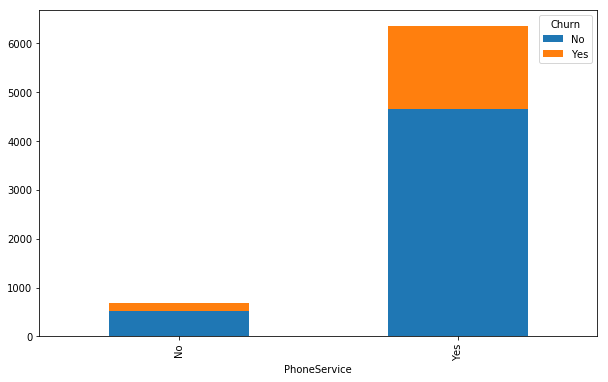

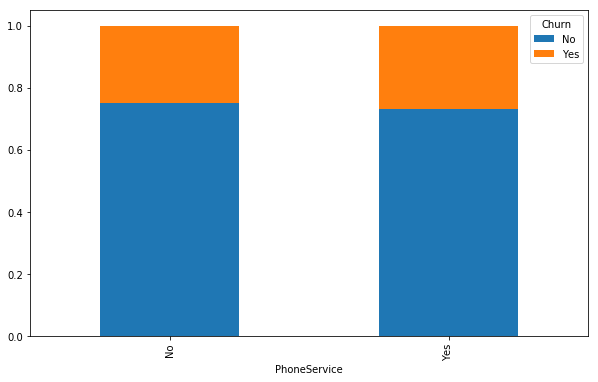

In [69]:
phoneservice_plot = df.groupby(['PhoneService', 'Churn']).size().reset_index().pivot(columns='Churn', index='PhoneService', values=0)
phoneservice_plot.plot(x=phoneservice_plot.index, kind='bar', stacked=True);
print('PhoneService', collections.Counter(df['PhoneService']))
phoneservice_plot
phoneservice_rate = phoneservice_plot.div(phoneservice_plot.sum(axis=1),axis=0)
phoneservice_rate
phoneservice_rate.plot(x=phoneservice_rate.index,kind='bar',stacked=True)

### MultipleLines

MultipleLines Counter({'No': 3390, 'Yes': 2971, 'No phone service': 682})


Churn,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


Churn,No,Yes
MultipleLines,,
No,0.749558,0.250442
No phone service,0.750733,0.249267
Yes,0.713901,0.286099


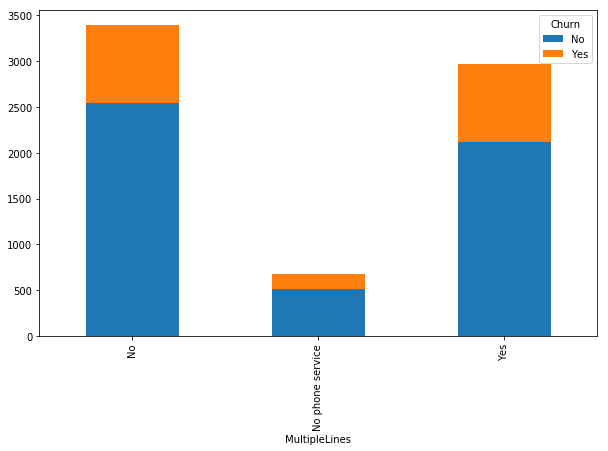

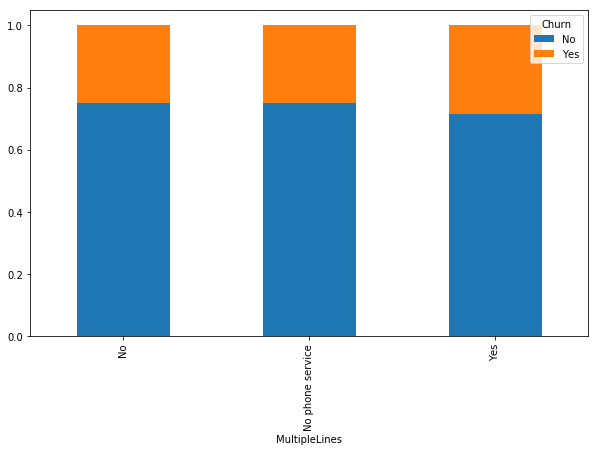

In [70]:
multiplelines_plot = df.groupby(['MultipleLines', 'Churn']).size().reset_index().pivot(columns='Churn', index='MultipleLines', values=0)
multiplelines_plot.plot(x=multiplelines_plot.index, kind='bar', stacked=True);
print('MultipleLines', collections.Counter(df['MultipleLines']))

multiplelines_plot
multiplelines_rate = multiplelines_plot.div(multiplelines_plot.sum(axis=1),axis=0)
multiplelines_rate
multiplelines_rate.plot(x=multiplelines_rate.index,kind='bar',stacked=True)

### InternetService

InternetService Counter({'Fiber optic': 3096, 'DSL': 2421, 'No': 1526})


Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


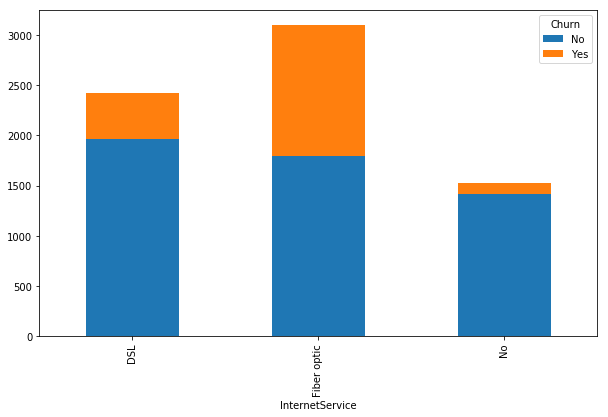

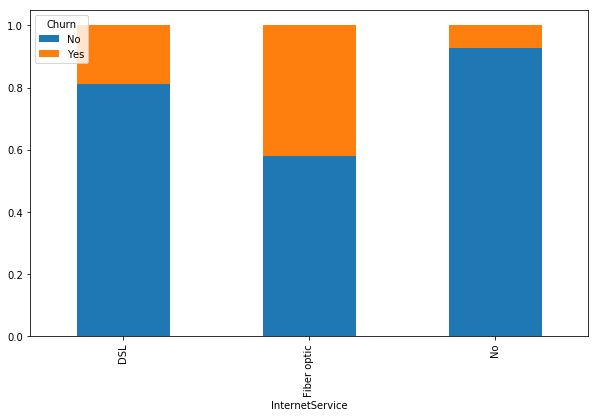

In [92]:
internetservice_plot = df.groupby(['InternetService', 'Churn']).size().reset_index().pivot(columns='Churn', index='InternetService', values=0)
internetservice_plot.plot(x=internetservice_plot.index, kind='bar', stacked=True);
print('InternetService', collections.Counter(df['InternetService']))

internetservice_plot
internetservice_rate = internetservice_plot.div(internetservice_plot.sum(axis=1),axis=0)
internetservice_rate
internetservice_rate.plot(x=internetservice_rate.index,kind='bar',stacked=True)

### OnlineSecurity

OnlineSecurity Counter({'No': 3498, 'Yes': 2019, 'No internet service': 1526})


Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


Churn,No,Yes
OnlineSecurity,,
No,0.582333,0.417667
No internet service,0.925950,0.074050
Yes,0.853888,0.146112


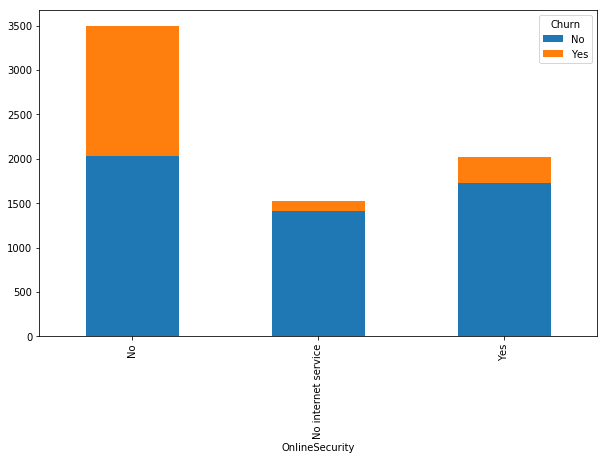

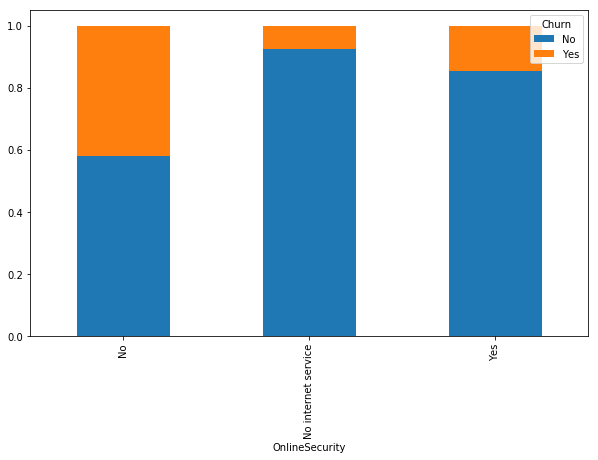

In [93]:
onlinesecurity_plot = df.groupby(['OnlineSecurity', 'Churn']).size().reset_index().pivot(columns='Churn', index='OnlineSecurity', values=0)
onlinesecurity_plot.plot(x=onlinesecurity_plot.index, kind='bar', stacked=True);
print('OnlineSecurity', collections.Counter(df['OnlineSecurity']))

onlinesecurity_plot
onlinesecurity_rate = onlinesecurity_plot.div(onlinesecurity_plot.sum(axis=1),axis=0)
onlinesecurity_rate
onlinesecurity_rate.plot(x=onlinesecurity_rate.index,kind='bar',stacked=True)

### OnlineBackup

OnlineBackup Counter({'No': 3088, 'Yes': 2429, 'No internet service': 1526})


Churn,No,Yes
OnlineBackup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


Churn,No,Yes
OnlineBackup,,
No,0.600712,0.399288
No internet service,0.925950,0.074050
Yes,0.784685,0.215315


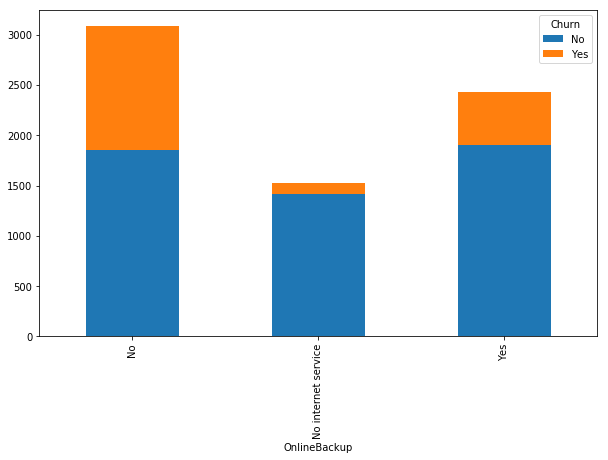

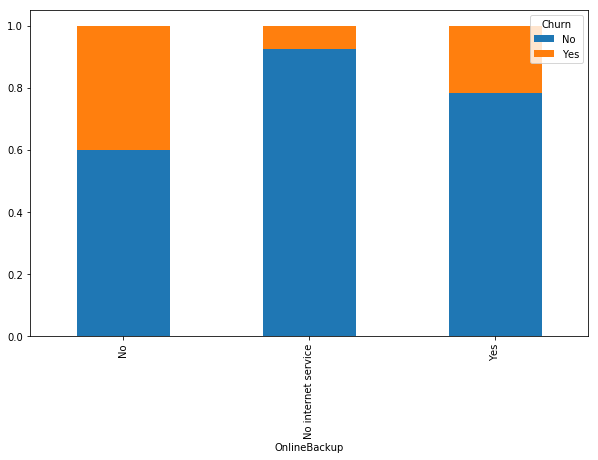

In [94]:
onlinebackup_plot = df.groupby(['OnlineBackup', 'Churn']).size().reset_index().pivot(columns='Churn', index='OnlineBackup', values=0)
onlinebackup_plot.plot(x=onlinebackup_plot.index, kind='bar', stacked=True);
print('OnlineBackup', collections.Counter(df['OnlineBackup']))

onlinebackup_plot
onlinebackup_rate = onlinebackup_plot.div(onlinebackup_plot.sum(axis=1),axis=0)
onlinebackup_rate
onlinebackup_rate.plot(x=onlinebackup_rate.index,kind='bar',stacked=True)

### DeviceProtection

DeviceProtection Counter({'No': 3095, 'Yes': 2422, 'No internet service': 1526})


Churn,No,Yes
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


Churn,No,Yes
DeviceProtection,,
No,0.608724,0.391276
No internet service,0.925950,0.074050
Yes,0.774979,0.225021


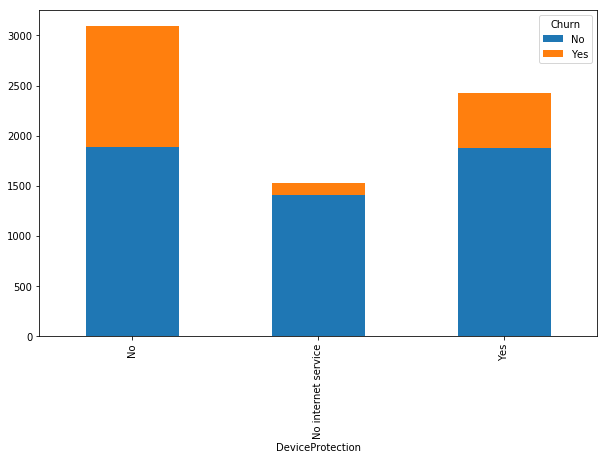

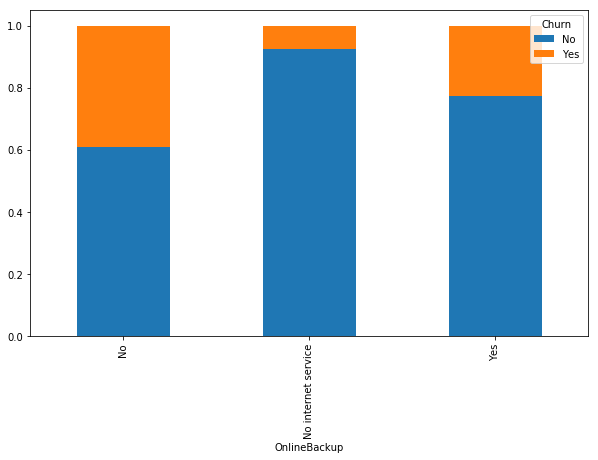

In [95]:
deviceprotection_plot = df.groupby(['DeviceProtection', 'Churn']).size().reset_index().pivot(columns='Churn', index='DeviceProtection', values=0)
deviceprotection_plot.plot(x=deviceprotection_plot.index, kind='bar', stacked=True);
print('DeviceProtection', collections.Counter(df['DeviceProtection']))

deviceprotection_plot
deviceprotection_rate = deviceprotection_plot.div(deviceprotection_plot.sum(axis=1),axis=0)
deviceprotection_rate
deviceprotection_rate.plot(x=onlinebackup_rate.index,kind='bar',stacked=True)

### TechSupport

TechSupport Counter({'No': 3473, 'Yes': 2044, 'No internet service': 1526})


Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


Churn,No,Yes
TechSupport,,
No,0.583645,0.416355
No internet service,0.925950,0.074050
Yes,0.848337,0.151663


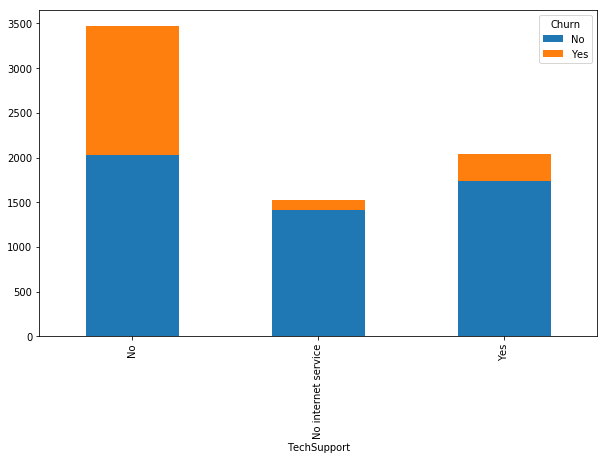

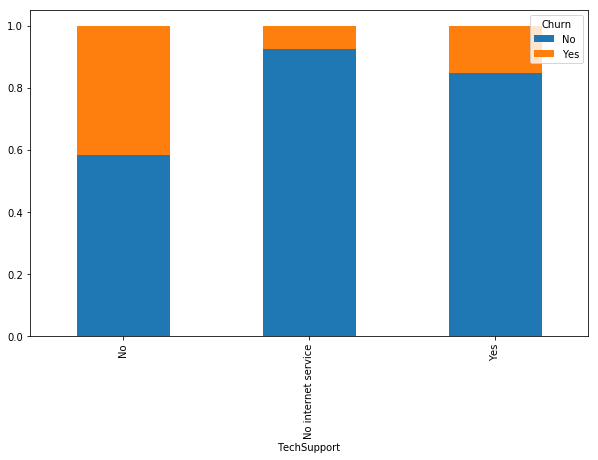

In [96]:
techsupport_plot = df.groupby(['TechSupport', 'Churn']).size().reset_index().pivot(columns='Churn', index='TechSupport', values=0)
techsupport_plot.plot(x=techsupport_plot.index, kind='bar', stacked=True);
print('TechSupport', collections.Counter(df['TechSupport']))

techsupport_plot
techsupport_rate = techsupport_plot.div(techsupport_plot.sum(axis=1),axis=0)
techsupport_rate
techsupport_rate.plot(x=techsupport_rate.index,kind='bar',stacked=True)

TechSupport seems to be an important factor for churn.

### StreamingTV

StreamingTV Counter({'No': 2810, 'Yes': 2707, 'No internet service': 1526})


Churn,No,Yes
StreamingTV,,
No,1868,942
No internet service,1413,113
Yes,1893,814


Churn,No,Yes
StreamingTV,,
No,0.664769,0.335231
No internet service,0.925950,0.074050
Yes,0.699298,0.300702


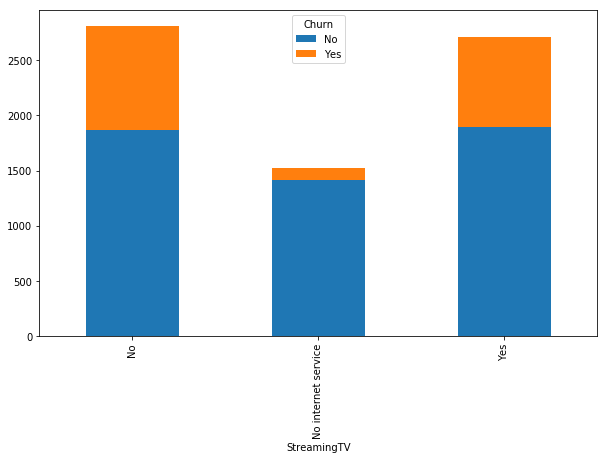

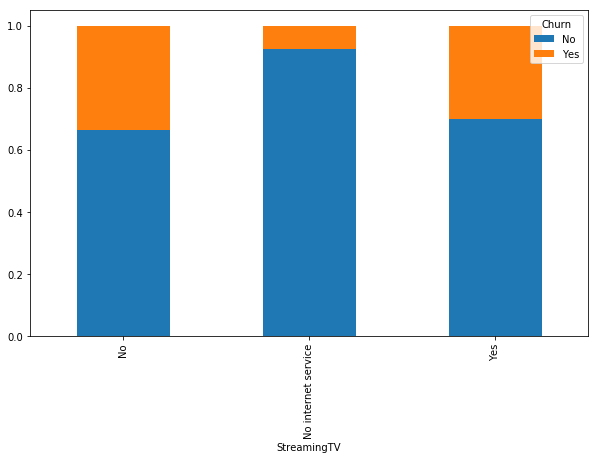

In [97]:
streamingtv_plot = df.groupby(['StreamingTV', 'Churn']).size().reset_index().pivot(columns='Churn', index='StreamingTV', values=0)
streamingtv_plot.plot(x=streamingtv_plot.index, kind='bar', stacked=True);
print('StreamingTV', collections.Counter(df['StreamingTV']))

streamingtv_plot
streamingtv_rate = streamingtv_plot.div(streamingtv_plot.sum(axis=1),axis=0)
streamingtv_rate
streamingtv_rate.plot(x=streamingtv_rate.index,kind='bar',stacked=True)

### StreamingMovies

StreamingMovies Counter({'No': 2785, 'Yes': 2732, 'No internet service': 1526})


Churn,No,Yes
StreamingMovies,,
No,1847,938
No internet service,1413,113
Yes,1914,818


Churn,No,Yes
StreamingMovies,,
No,0.663196,0.336804
No internet service,0.925950,0.074050
Yes,0.700586,0.299414


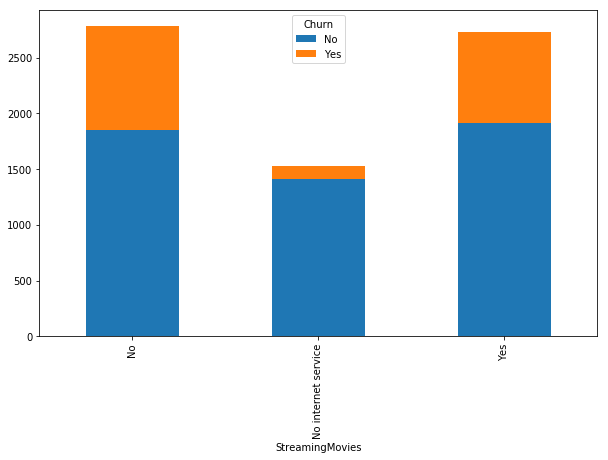

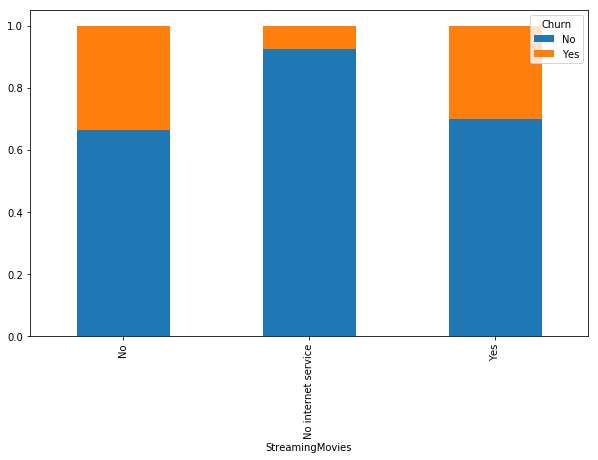

In [98]:
streamingmovies_plot = df.groupby(['StreamingMovies', 'Churn']).size().reset_index().pivot(columns='Churn', index='StreamingMovies', values=0)
streamingmovies_plot.plot(x=streamingmovies_plot.index, kind='bar', stacked=True);
print('StreamingMovies', collections.Counter(df['StreamingMovies']))

streamingmovies_plot
streamingmovies_rate = streamingmovies_plot.div(streamingmovies_plot.sum(axis=1),axis=0)
streamingmovies_rate
streamingmovies_rate.plot(x=streamingmovies_rate.index,kind='bar',stacked=True)

### Contract

Contract Counter({'Month-to-month': 3875, 'Two year': 1695, 'One year': 1473})


Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


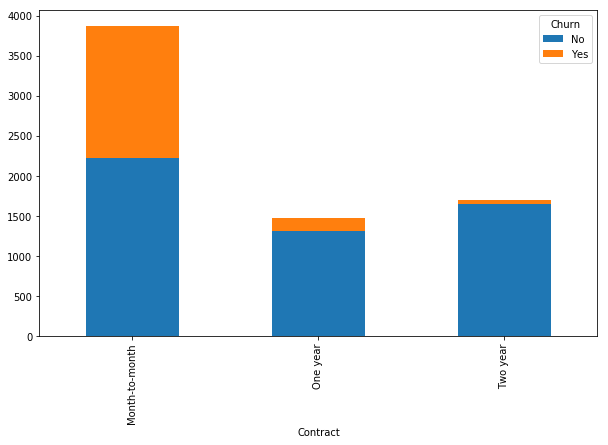

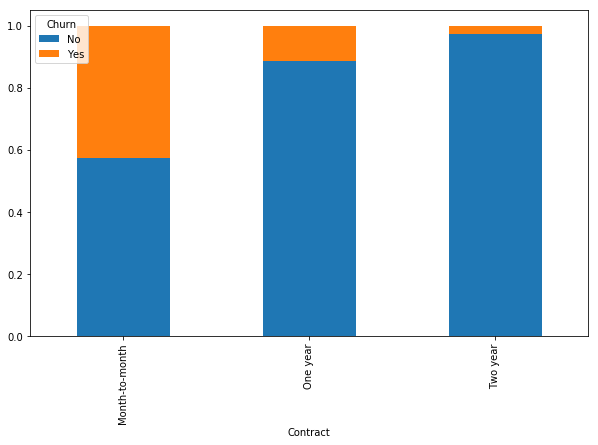

In [100]:
contract_plot = df.groupby(['Contract', 'Churn']).size().reset_index().pivot(columns='Churn', index='Contract', values=0)
contract_plot.plot(x=contract_plot.index, kind='bar', stacked=True);
print('Contract', collections.Counter(df['Contract']))

contract_plot
contract_rate = contract_plot.div(contract_plot.sum(axis=1),axis=0)
contract_rate
contract_rate.plot(x=contract_rate.index,kind='bar',stacked=True)

It is so obvious that contract term does have an effect on churn. There were very few churns when customers have a two-year contract. And most churns occurred on customers with a month-to-month contract.

### PaperlessBilling

PaperlessBilling Counter({'Yes': 4171, 'No': 2872})


Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


Churn,No,Yes
PaperlessBilling,,
No,0.836699,0.163301
Yes,0.664349,0.335651


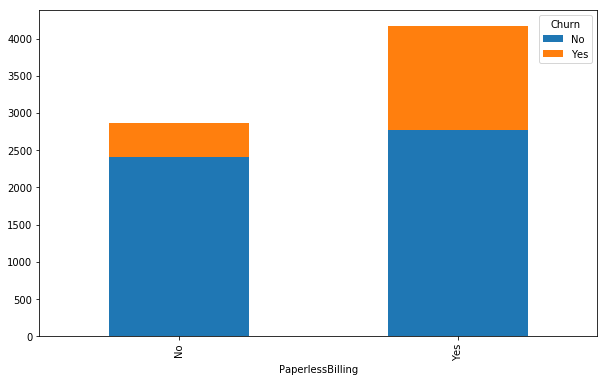

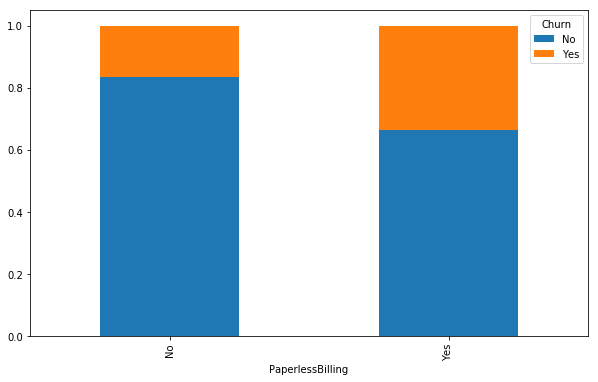

In [101]:
paperlessbilling_plot = df.groupby(['PaperlessBilling', 'Churn']).size().reset_index().pivot(columns='Churn', index='PaperlessBilling', values=0)
paperlessbilling_plot.plot(x=paperlessbilling_plot.index, kind='bar', stacked=True);
print('PaperlessBilling', collections.Counter(df['PaperlessBilling']))

paperlessbilling_plot
paperlessbilling_rate = paperlessbilling_plot.div(paperlessbilling_plot.sum(axis=1),axis=0)
paperlessbilling_rate
paperlessbilling_rate.plot(x=paperlessbilling_rate.index,kind='bar',stacked=True)

### PaymentMethod

PaymentMethod Counter({'Electronic check': 2365, 'Mailed check': 1612, 'Bank transfer (automatic)': 1544, 'Credit card (automatic)': 1522})


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


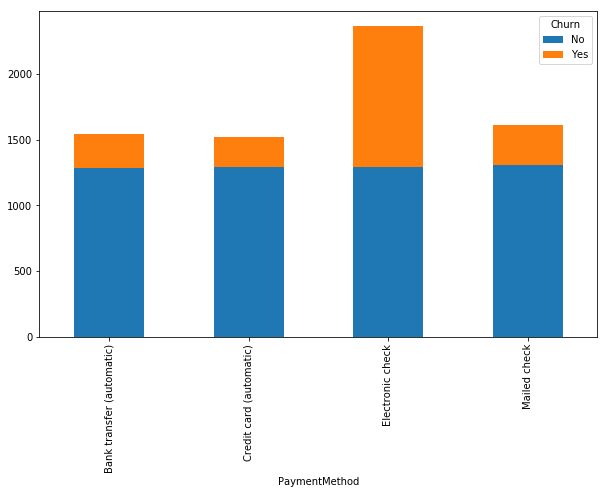

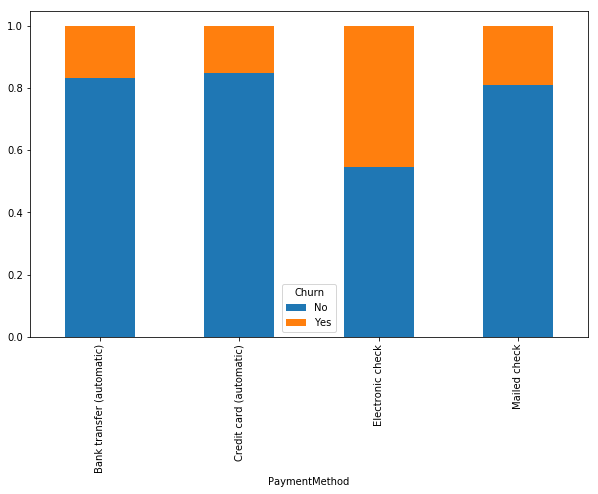

In [102]:
paymentmethod_plot = df.groupby(['PaymentMethod', 'Churn']).size().reset_index().pivot(columns='Churn', index='PaymentMethod', values=0)
paymentmethod_plot.plot(x=paymentmethod_plot.index, kind='bar', stacked=True);
print('PaymentMethod', collections.Counter(df['PaymentMethod']))

paymentmethod_plot
paymentmethod_rate = paymentmethod_plot.div(paymentmethod_plot.sum(axis=1),axis=0)
paymentmethod_rate
paymentmethod_rate.plot(x=paymentmethod_rate.index,kind='bar',stacked=True)

PaymentMethod does have an effect on churn, in particular, pay by electronic check has the highest percentage churning rate.

### SeniorCitizen

SeniorCitizen Counter({0: 5901, 1: 1142})


Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


Churn,No,Yes
SeniorCitizen,,
0,0.763938,0.236062
1,0.583187,0.416813


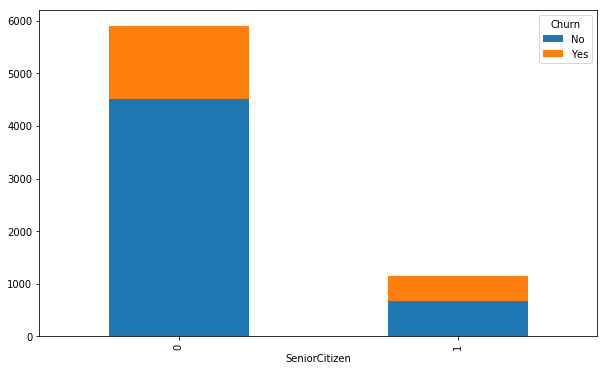

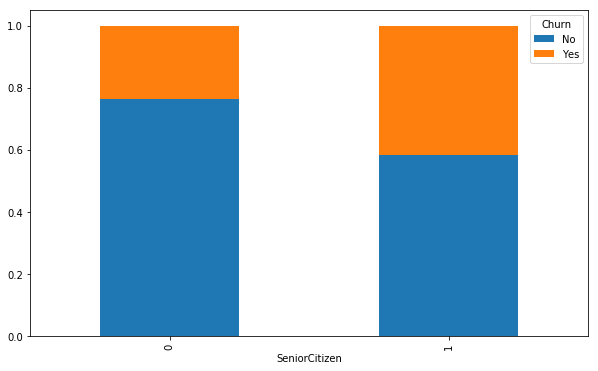

In [103]:
seniorcitizen_plot = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index().pivot(columns='Churn', index='SeniorCitizen', values=0)
seniorcitizen_plot.plot(x=seniorcitizen_plot.index, kind='bar', stacked=True);
print('SeniorCitizen', collections.Counter(df['SeniorCitizen']))

seniorcitizen_plot
seniorcitizen_rate = seniorcitizen_plot.div(seniorcitizen_plot.sum(axis=1),axis=0)
seniorcitizen_rate
seniorcitizen_rate.plot(x=seniorcitizen_rate.index,kind='bar',stacked=True)

We do not have many senior citizens in the data.

## Explore Numeric Features

### Tenure

D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


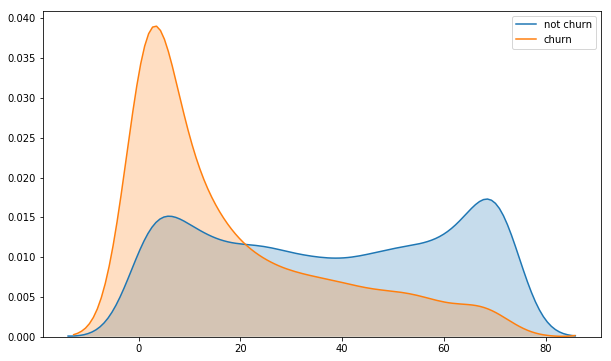

In [121]:
sns.kdeplot(df['tenure'].loc[df['Churn'] == 'No'], label='not churn', shade=True)
sns.kdeplot(df['tenure'].loc[df['Churn'] == 'Yes'], label='churn', shade=True)

In [125]:
df['tenure'].loc[df['Churn'] == 'No'].describe()

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

In [126]:
df['tenure'].loc[df['Churn'] == 'Yes'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

Not churned customers have a much longer average tenure (20 months) than the churned customers. Makes sense.

### Monthly Charges

D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


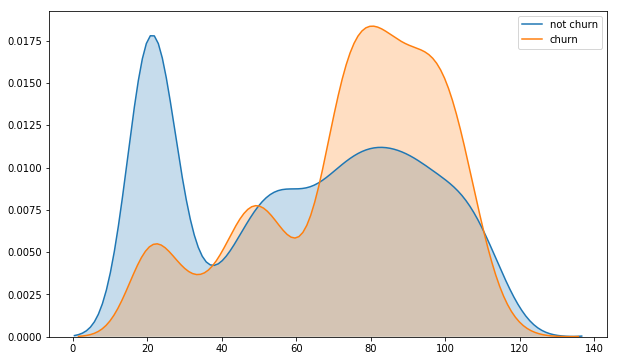

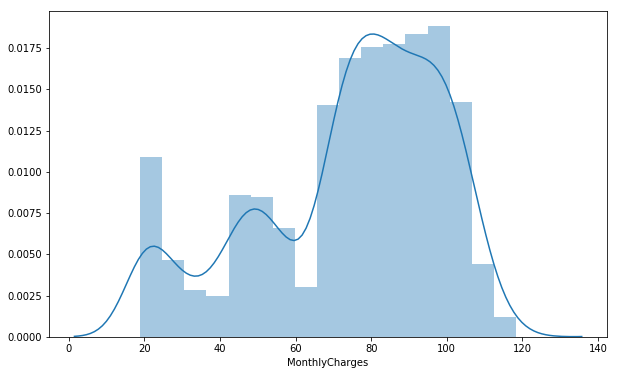

In [141]:
sns.kdeplot(df['MonthlyCharges'].loc[df['Churn'] == 'No'], label='not churn', shade=True);
sns.kdeplot(df['MonthlyCharges'].loc[df['Churn'] == 'Yes'], label='churn', shade=True);
plt.show()
sns.distplot(df['MonthlyCharges'].loc[df['Churn'] == 'Yes'])

In [142]:
df['MonthlyCharges'].loc[df['Churn'] == 'No'].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [143]:
df['MonthlyCharges'].loc[df['Churn'] == 'Yes'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

Churned customers paid over 20% higher on average monthly fee than non-churned customers. Money talks. 

### Total Charges

D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


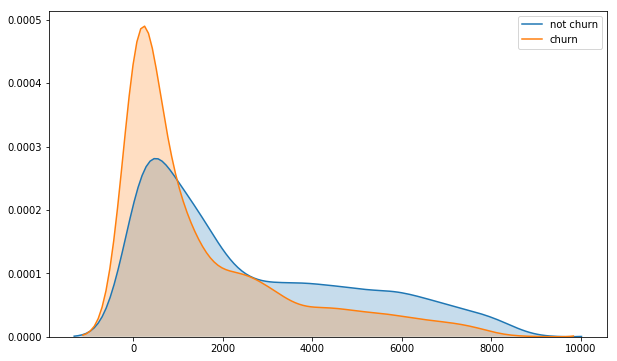

In [144]:
sns.kdeplot(df['TotalCharges'].loc[df['Churn'] == 'No'], label='not churn', shade=True);
sns.kdeplot(df['TotalCharges'].loc[df['Churn'] == 'Yes'], label='churn', shade=True);

### Encode labels with value between 0 and 1.

In [145]:
le = preprocessing.LabelEncoder()
df['Churn'] = le.fit_transform(df.Churn.values)

Fill nan with mean of the column

In [146]:
df = df.fillna(df.mean())

### Encode categorical features

In [147]:
categorical =  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for f in categorical:
    dummies = pd.get_dummies(df[f], prefix = f, prefix_sep = '_')
    df = pd.concat([df, dummies], axis = 1)
# drop original categorical features
df.drop(categorical, axis = 1, inplace = True)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
customerID                                 7043 non-null object
SeniorCitizen                              7043 non-null int64
tenure                                     7043 non-null int64
MonthlyCharges                             7043 non-null float64
TotalCharges                               7043 non-null float64
Churn                                      7043 non-null int32
gender_Female                              7043 non-null uint8
gender_Male                                7043 non-null uint8
Partner_No                                 7043 non-null uint8
Partner_Yes                                7043 non-null uint8
Dependents_No                              7043 non-null uint8
Dependents_Yes                             7043 non-null uint8
PhoneService_No                            7043 non-null uint8
PhoneService_Yes                           7043 non-null uint8
Multip

### Autoencoder

In [149]:
df.head(3)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [150]:
df.shape

(7043, 47)

In [151]:
X_train, X_val = train_test_split(df, test_size=2958)

cols = [c for c in df.columns if c not in ['customerID','Churn']]
y_train = X_train['Churn'].as_matrix()
X_train = MinMaxScaler().fit_transform(X_train[cols])
y_val= X_val['Churn'].as_matrix()
X_val = MinMaxScaler().fit_transform(X_val[cols])

print(y_train.shape, y_val.shape)

(4085,) (2958,)


D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [152]:
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=1479, random_state=0)
print(y_train.shape, y_val.shape, y_test.shape, df.shape)

(4085,) (1479,) (1479,) (7043, 47)


Create batch to send through our network

In [155]:
def fit_batchsize(X,y,batch_size):
    n_size = (len(X)//batch_size)*batch_size
    X = X[0:n_size]
    y = y[0:n_size]
    return X, y

batch_size = 100

X_train, y_train = fit_batchsize(X_train,y_train, batch_size)
X_val, y_val = fit_batchsize(X_val, y_val, batch_size)

X_test,y_test = fit_batchsize(X_test,y_test, batch_size)
print(X_val.shape, X_train.shape)

(1400, 45) (4000, 45)


###  Implementation

In [156]:
# Define input layer
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,))
# Define Encoder layers
n_z = 2
n_epoch = 200

h_q = Dense(512, activation='relu')(inputs)
mu = Dense(n_z, activation='linear')(h_q)
log_sigma = Dense(n_z, activation='linear')(h_q)

# Encoder model, to encode input into latent variable
# We use the mean as the output as it is the center point, the representative of the gaussian
encoder = Model(inputs, mu)

def sample_z(args):
    mu, log_sigma = args
    eps = K.random_normal(shape=(batch_size, n_z), mean=0., stddev=1.)
    return mu + K.exp(log_sigma / 2) * eps


# Sample z ~ Q(z|X)
z = Lambda(sample_z, name='sampleZ', output_shape=(n_z,))([mu, log_sigma])

# Define decoder layers in VAE model
decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(input_dim, activation='sigmoid')

h_p = decoder_hidden(z)
outputs = decoder_out(h_p)

# Overall VAE model, for reconstruction and training
vae = Model(inputs, outputs)

# Generator model, generate new data given latent variable z
d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
decoder = Model(d_in, d_out)

In [157]:
# translate our loss into Keras code
def vae_loss(y_true, y_pred):
    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """
    recon = K.sum(K.binary_crossentropy(y_pred, y_true), axis=1)
    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

    return recon + kl

In [158]:
vae.compile(optimizer='adam', loss=vae_loss)
vae_history = vae.fit(X_train, X_train, batch_size=batch_size, shuffle=True, 
                      validation_data = (X_val, X_val),
                    epochs=n_epoch, callbacks = [EarlyStopping(monitor='loss',patience = 3)])

Train on 4000 samples, validate on 1400 samples
Epoch 1/200
4000/4000 [==============================] - 1s 253us/step - loss: 279.0559 - val_loss: 220.0974
Epoch 2/200
4000/4000 [==============================] - 0s 48us/step - loss: 192.3869 - val_loss: 171.3130
Epoch 3/200
4000/4000 [==============================] - 0s 46us/step - loss: 159.4136 - val_loss: 150.6408
Epoch 4/200
4000/4000 [==============================] - 0s 42us/step - loss: 145.4155 - val_loss: 143.3617
Epoch 5/200
4000/4000 [==============================] - 0s 43us/step - loss: 139.7325 - val_loss: 138.5291
Epoch 6/200
4000/4000 [==============================] - 0s 42us/step - loss: 133.9368 - val_loss: 132.1950
Epoch 7/200
4000/4000 [==============================] - 0s 42us/step - loss: 128.8403 - val_loss: 128.3780
Epoch 8/200
4000/4000 [==============================] - 0s 44us/step - loss: 126.2158 - val_loss: 126.2466
Epoch 9/200
4000/4000 [==============================] - 0s 42us/step - loss: 124.7394 

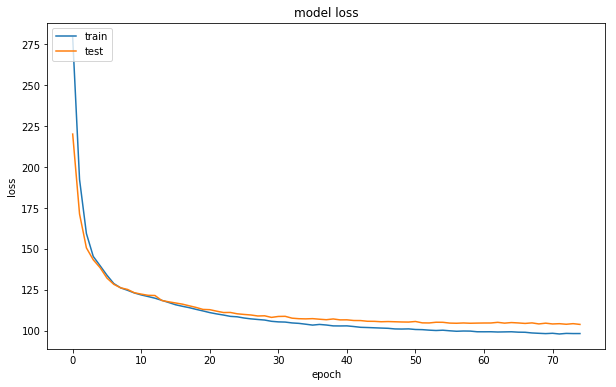

In [159]:
plt.plot(vae_history.history['loss'])
plt.plot(vae_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show();

We use reconstruction error to measure how well the decoder is performing. Autoencoders are trained to reduce reconstruction error which we show below:

D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


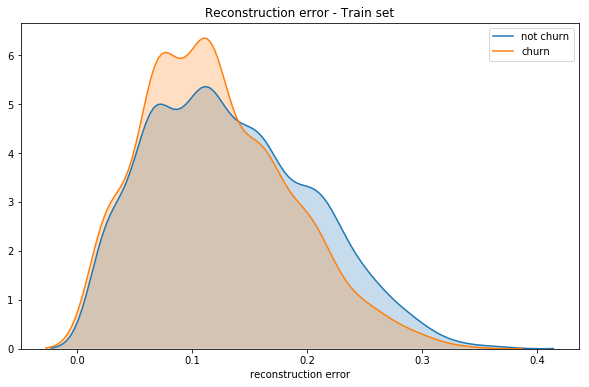

In [161]:
x_train_encoded = encoder.predict(X_train)

pred_train = decoder.predict(x_train_encoded)
mse = np.mean(np.power(X_train - pred_train, 2), axis=1)
error_df = pd.DataFrame({'recon_error': mse,
                        'churn': y_train})

plt.figure(figsize=(10,6))
sns.kdeplot(error_df.recon_error[error_df.churn==0], label='not churn', shade=True, clip=(0,10))
sns.kdeplot(error_df.recon_error[error_df.churn==1], label='churn', shade=True, clip=(0,10))
plt.xlabel('reconstruction error');
plt.title('Reconstruction error - Train set');

D:\ProgramData\Anaconda3\envs\normal\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


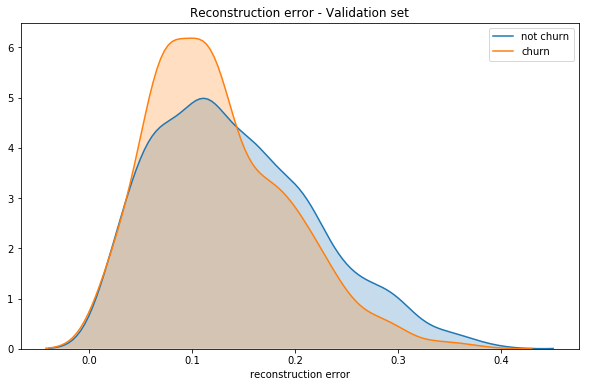

In [162]:
x_val_encoded = encoder.predict(X_val)

pred = decoder.predict(x_val_encoded)
mseV = np.mean(np.power(X_val - pred, 2), axis=1)
error_df = pd.DataFrame({'recon_error': mseV,
                        'churn': y_val})

plt.figure(figsize=(10,6))
sns.kdeplot(error_df.recon_error[error_df.churn==0], label='not churn', shade=True, clip=(0,10))
sns.kdeplot(error_df.recon_error[error_df.churn==1], label='churn', shade=True, clip=(0,10))
plt.xlabel('reconstruction error');
plt.title('Reconstruction error - Validation set');

### Latent space

We can see that Churn and Not Churn customers, can be separable at latent space.

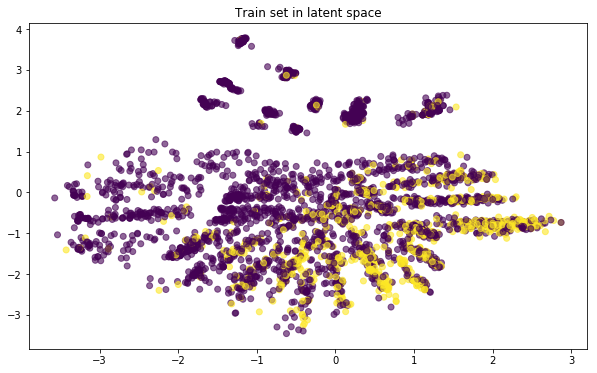

In [163]:
x_train_encoded = encoder.predict(X_train)

plt.scatter(x_train_encoded[:, 0], x_train_encoded[:, 1], 
            c=y_train, alpha=0.6)
plt.title('Train set in latent space')
plt.show();

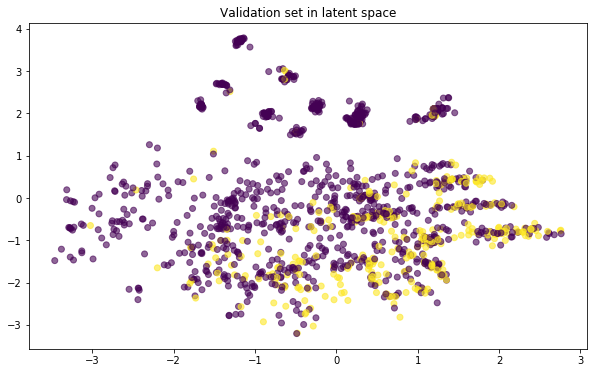

In [164]:
x_val_encoded = encoder.predict(X_val)

plt.scatter(x_val_encoded[:, 0], x_val_encoded[:, 1], 
            c=y_val, alpha=0.6)

plt.title('Validation set in latent space')
plt.show();

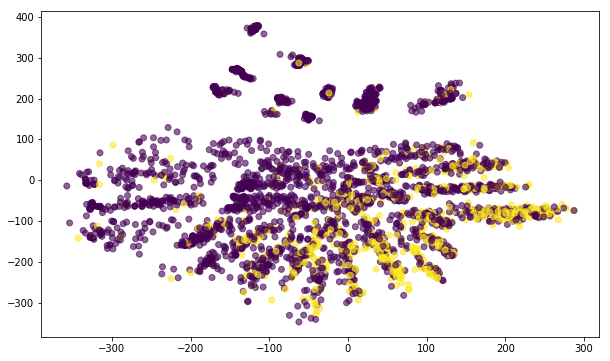

In [165]:
x_train_encoded = encoder.predict(X_train)
plt.scatter(100.*x_train_encoded[:, 0], 100.*x_train_encoded[:, 1], 
            c=y_train, alpha=0.6)
plt.show();

### Classification in Latent space

Any classification method can be used, lets try nearest neighbour

Playing with classification parameter to get best prediction on Validation set

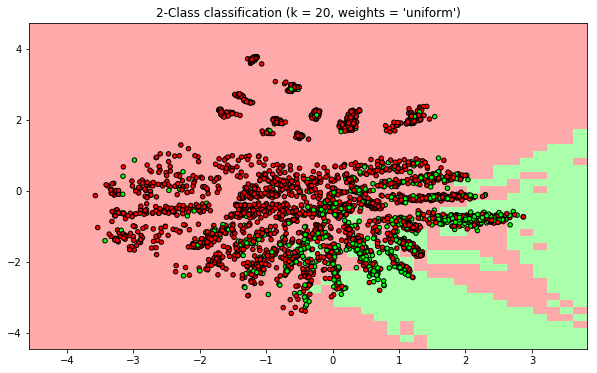

In [166]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
weights='uniform'
n_neighbors=20
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
X=x_train_encoded
y=y_train
clf.fit(X, y)

h=0.2
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i, weights = '%s')"
            % (n_neighbors, weights));

Prediction on the validation set.

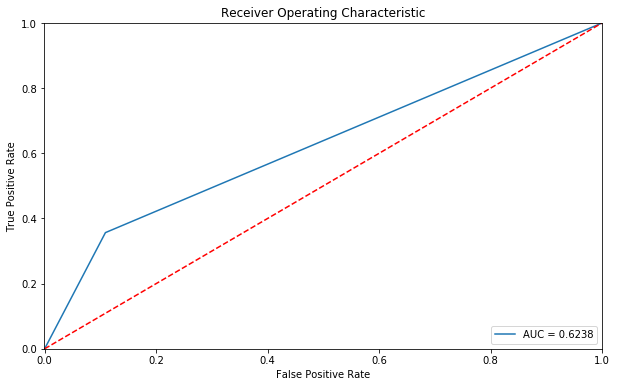

In [167]:
x_val_encoded = encoder.predict(X_val)
fpr, tpr, thresholds = roc_curve(y_val, clf.predict(x_val_encoded))
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [168]:
print('Accuracy:')
print(accuracy_score(y_val, clf.predict(x_val_encoded)))
print("Confusion Matrix:")
print(confusion_matrix(y_val,clf.predict(x_val_encoded)))
print("Classification Report:")
print(classification_report(y_val,clf.predict(x_val_encoded)))

Accuracy:
0.7485714285714286
Confusion Matrix:
[[915 112]
 [240 133]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1027
           1       0.54      0.36      0.43       373

   micro avg       0.75      0.75      0.75      1400
   macro avg       0.67      0.62      0.63      1400
weighted avg       0.73      0.75      0.73      1400



Prediction on the test set

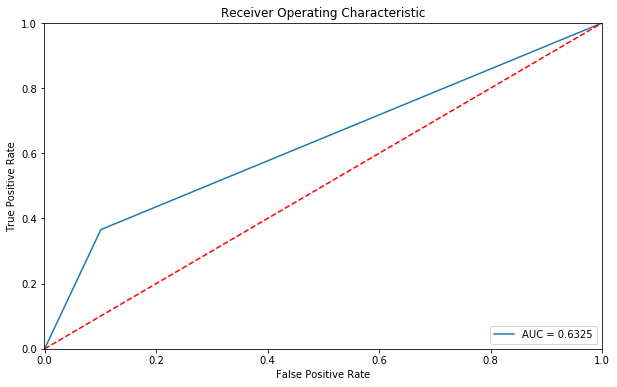

In [34]:
x_test_encoded = encoder.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict(x_test_encoded))
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [35]:
print('Accuracy:')
print(accuracy_score(y_test, clf.predict(x_test_encoded)))
print("Confusion Matrix:")
print(confusion_matrix(y_test,clf.predict(x_test_encoded)))
print("Classification Report:")
print(classification_report(y_test,clf.predict(x_test_encoded)))

Accuracy:
0.758571428571
Confusion Matrix:
[[927 104]
 [234 135]]
Classification Report:
             precision    recall  f1-score   support

          0       0.80      0.90      0.85      1031
          1       0.56      0.37      0.44       369

avg / total       0.74      0.76      0.74      1400

